In [1]:
import import_ipynb
import epirecipes

importing Jupyter notebook from epirecipes.ipynb
Initializing Julia interpreter. This may take some time...


## SIR model in R using deSolve

### Description

### Equations

$$
\frac{dS(t)}{dt}  = -\beta S(t) I(t)\\
\frac{dI(t)}{dt}  = \beta S(t) I(t)- \gamma I(t)\\
\frac{dR(t)}{dt}  = \gamma I(t)
$$

### References

### Implementation

In [2]:
%%R
sir.ode <- function(times,init,parms){
  with(as.list(c(parms,init)), {
  # ODEs
  dS <- -beta*S*I
  dI <- beta*S*I-gamma*I
  dR <- gamma*I
  list(c(dS,dI,dR))
  })
}
parms <- c(beta=0.1,gamma=0.05)
init <- c(S=0.99,I=0.01,R=0) 
times <- seq(0,200,by=0.01)
sir.out <- lsoda(init,times,sir.ode,parms)

In [3]:
%%R
sir.out.long <- melt(as.data.frame(sir.out),"time")

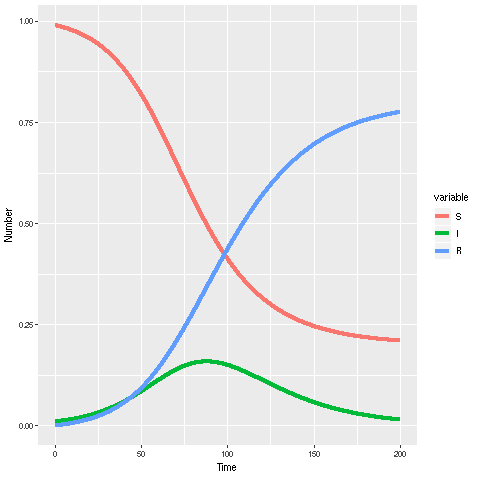

In [5]:
%%R
ggplot(sir.out.long,aes(x=time,y=value,colour=variable,group=variable))+
  # Add line
  geom_line(lwd=2)+
  #Add labels
  xlab("Time")+ylab("Number")